# Material Analysis

## analising HSV values of a sample image



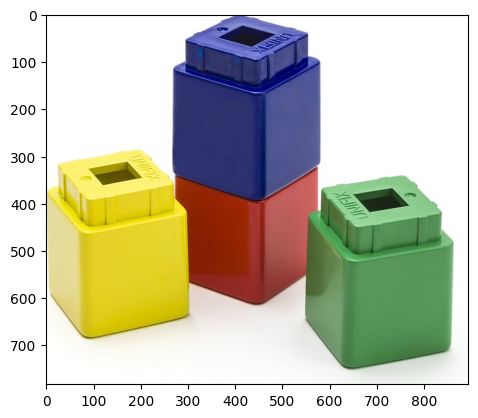

In [6]:


#import image from the computer
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imageio
from findpeaks import findpeaks

rgb_img = imageio.imread('photos/coloured_cubes_sample.jpg')
plt.imshow(rgb_img)

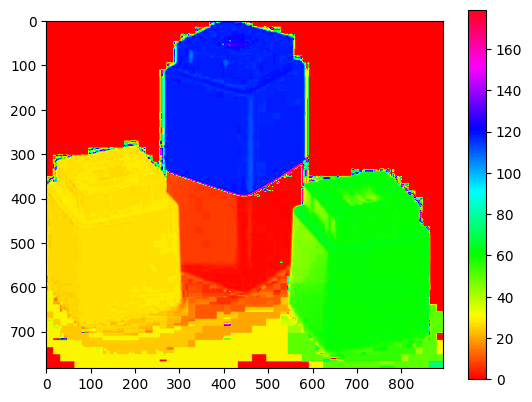

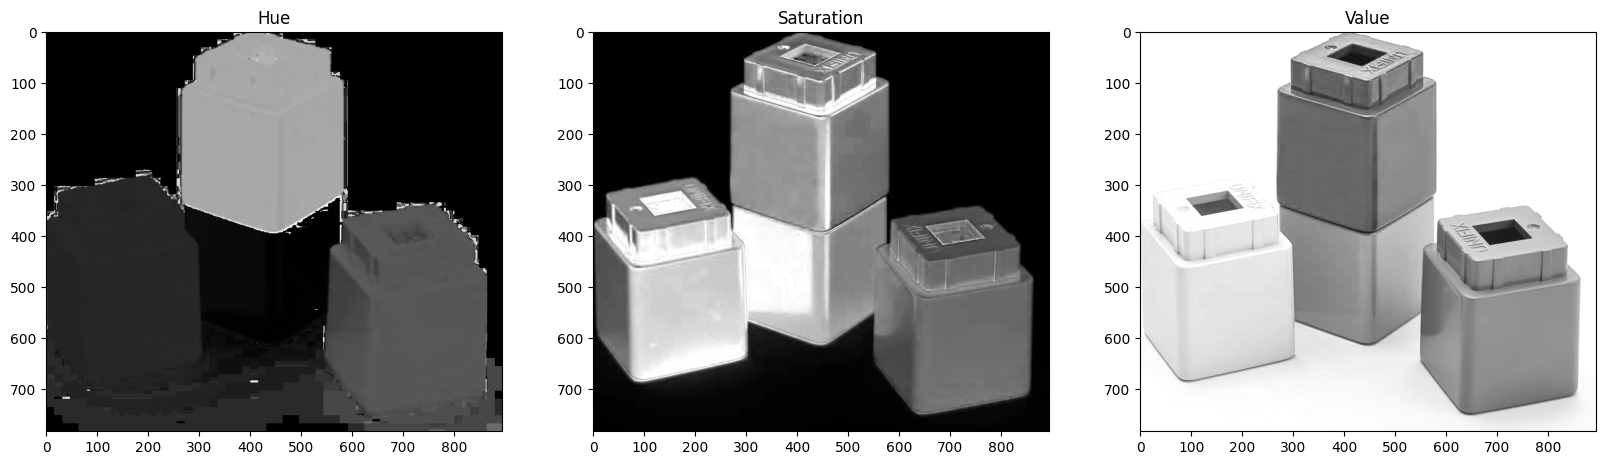

In [7]:
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)
plt.imshow(hsv_img)

h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]

#the hue in color
plt.imshow(hsv_img[:,:,0],cmap='hsv')
plt.colorbar()

# the HSV values plotted independently
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))
ax1.set_title('Hue')
ax1.imshow(h, cmap = 'gray')
ax2.set_title('Saturation')
ax2.imshow(s, cmap = 'gray')
ax3.set_title('Value')
ax3.imshow(v, cmap = 'gray')


# segmentation of a single object

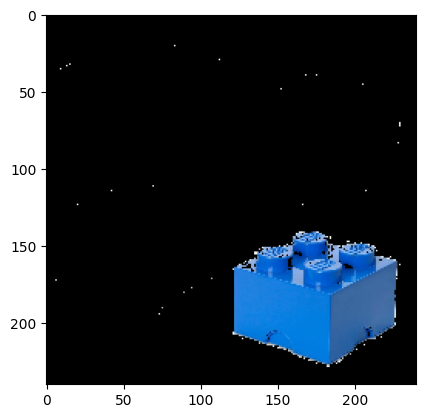

In [14]:
#mask for object segmentation
# blue color
lower_mask = hsv_img[:,:,0] > 90
upper_mask = hsv_img[:,:,0] < 110
mask = upper_mask*lower_mask
plt.imshow(mask)

red = rgb_img[:,:,0]*mask
green = rgb_img[:,:,1]*mask
blue = rgb_img[:,:,2]*mask
masked_img = np.dstack((red,green,blue))
plt.imshow(masked_img)

## analyzing the HSV difference of masked and unmasked object

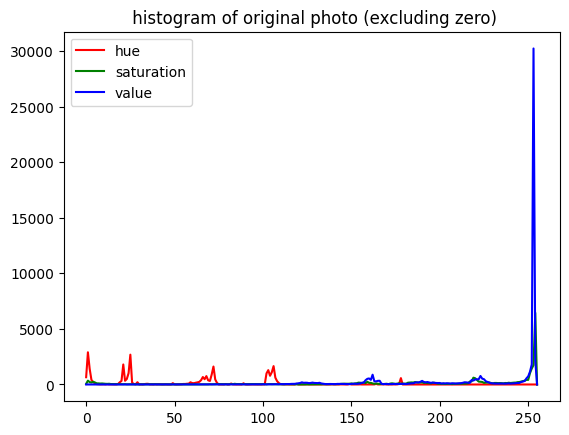

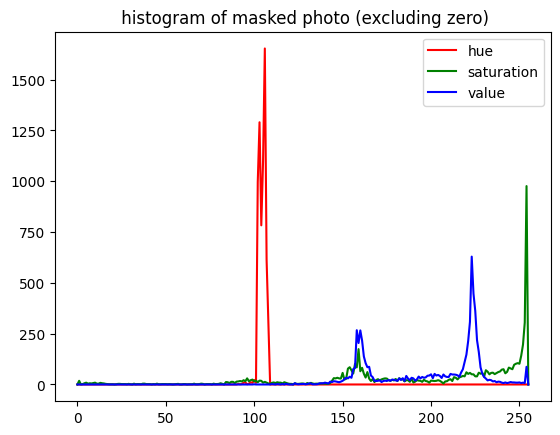

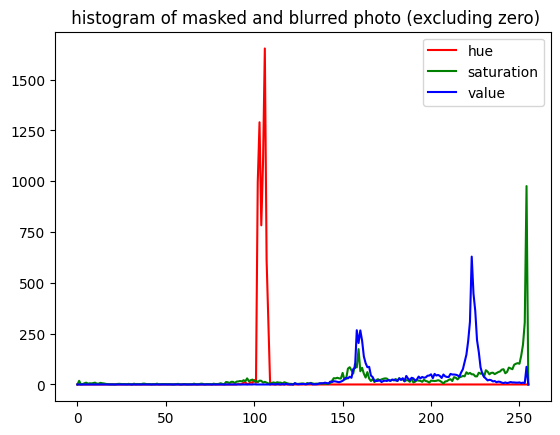

In [15]:
#original photo data 
hist_h = cv.calcHist([h],[0],None,[256],[1,256])
hist_s = cv.calcHist([s],[0],None,[256],[1,256])
hist_v = cv.calcHist([v],[0],None,[256],[1,256])
plt.plot(hist_h, color='r', label="hue")
plt.plot(hist_s, color='g', label="saturation")
plt.plot(hist_v, color='b', label="value")
plt.title(' histogram of original photo (excluding zero)')
plt.legend()
plt.show()

#masked photo data 
hsv_masked_img = cv.cvtColor(masked_img, cv.COLOR_RGB2HSV)
hm = hsv_masked_img[:,:,0]
sm = hsv_masked_img[:,:,1]
vm = hsv_masked_img[:,:,2]

hist_hm = cv.calcHist([hm],[0],None,[256],[1,256])
hist_sm = cv.calcHist([sm],[0],None,[256],[1,256])
hist_vm = cv.calcHist([vm],[0],None,[256],[1,256])
plt.plot(hist_hm, color='r', label="hue")
plt.plot(hist_sm, color='g', label="saturation")
plt.plot(hist_vm, color='b', label="value")
plt.title(' histogram of masked photo (excluding zero)')
plt.legend()
plt.show()

#blurred photo data 
#blurring
kernel_size=5
smooth_img = cv.GaussianBlur(masked_img, (kernel_size, kernel_size), 0)

hsv_smooth_img = cv.cvtColor(smooth_img, cv.COLOR_RGB2HSV)
hms = hsv_masked_img[:,:,0]
sms = hsv_masked_img[:,:,1]
vms = hsv_masked_img[:,:,2]

hist_hms = cv.calcHist([hms],[0],None,[256],[1,256])
hist_sms = cv.calcHist([sms],[0],None,[256],[1,256])
hist_vms = cv.calcHist([vms],[0],None,[256],[1,256])
plt.plot(hist_hms, color='r', label="hue")
plt.plot(hist_sms, color='g', label="saturation")
plt.plot(hist_vms, color='b', label="value")
plt.title(' histogram of masked and blurred photo (excluding zero)')
plt.legend()
plt.show()


## Testing a photo with many colors

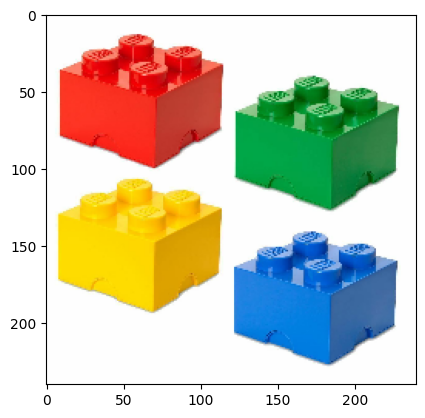

In [17]:
# trying with a photo with many colors

rgb_img = imageio.imread("C:/Users/Ana Stojanovic/OneDrive/Desktop/IIB project/photos/lego_sample.png")
plt.imshow(rgb_img)

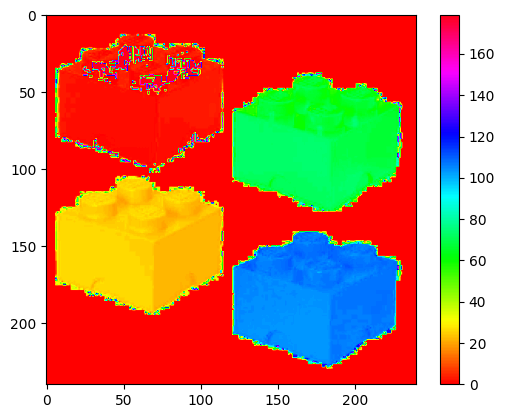

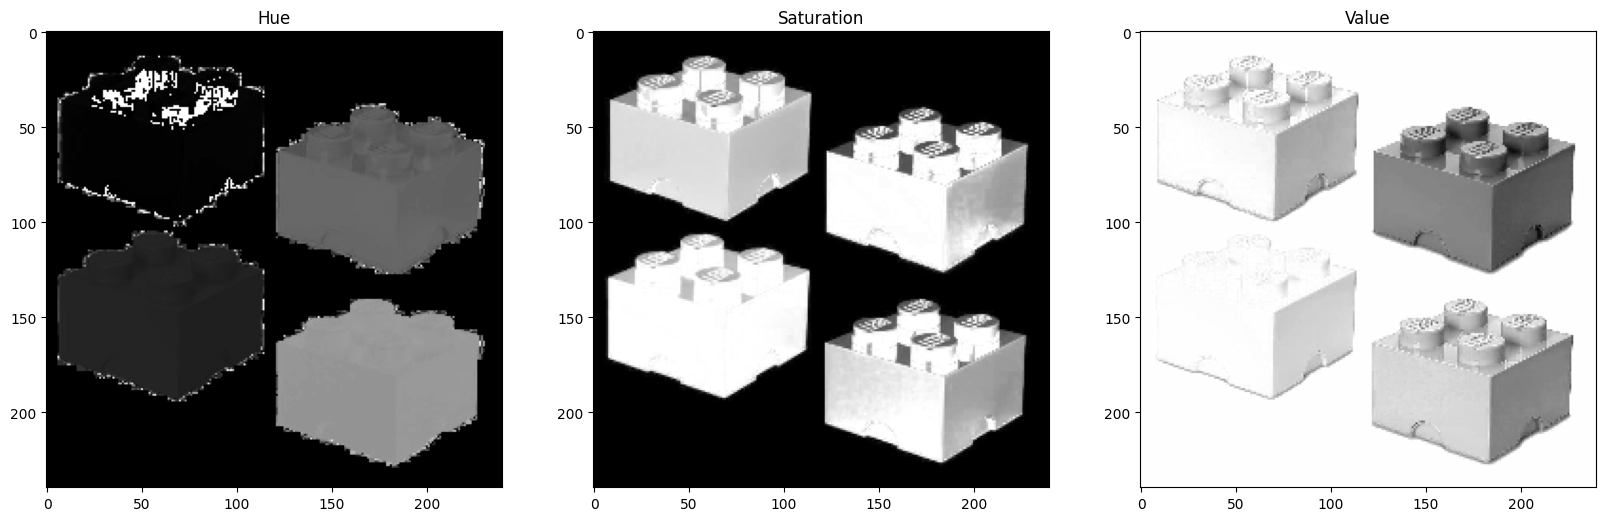

In [18]:
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)
plt.imshow(hsv_img)

h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]

#the hue in color
plt.imshow(hsv_img[:,:,0],cmap='hsv')
plt.colorbar()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))
ax1.set_title('Hue')
ax1.imshow(h, cmap = 'gray')
ax2.set_title('Saturation')
ax2.imshow(s, cmap = 'gray')
ax3.set_title('Value')
ax3.imshow(v, cmap = 'gray')


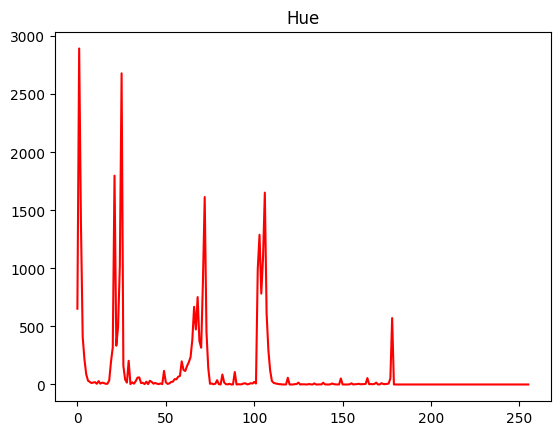

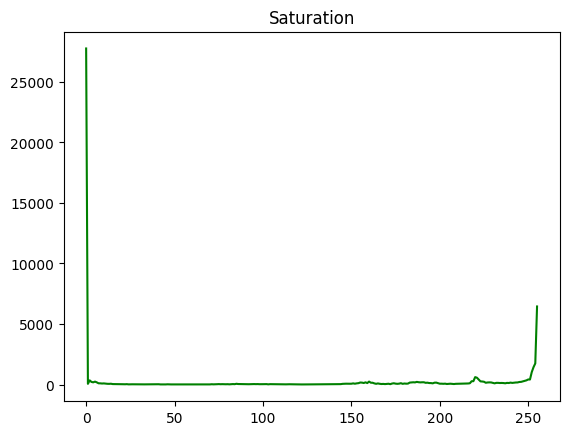

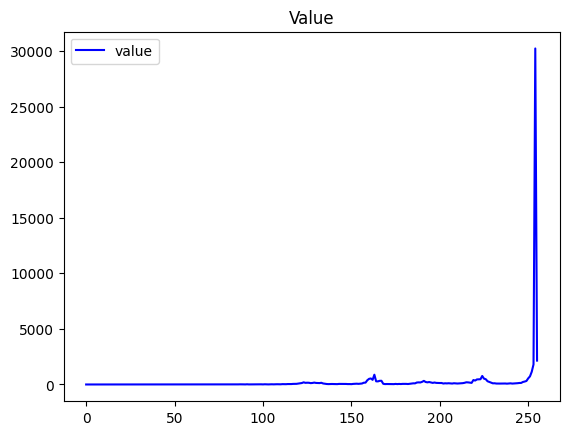

In [19]:

hist_h = cv.calcHist([h],[0],None,[256],[1,256])
hist_s = cv.calcHist([s],[0],None,[256],[0,256])
hist_v = cv.calcHist([v],[0],None,[256],[0,256])

plt.plot(hist_h, color='r', label="hue")
plt.title('Hue')
plt.figure()
plt.plot(hist_s, color='g', label="saturation")
plt.title('Saturation')
plt.figure()
plt.plot(hist_v, color='b', label="value")
plt.title('Value')
plt.legend()

[  1  25  72 106]
{'prominences': array([2242., 2675., 1606., 1653.]), 'left_bases': array([ 0, 17, 52, 90], dtype=int64), 'right_bases': array([ 11,  30,  81, 116], dtype=int64)}


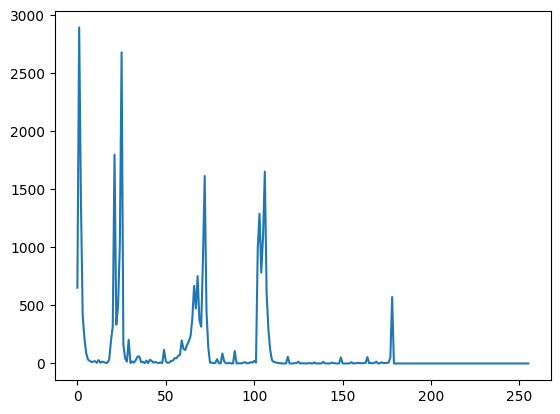

In [20]:

import scipy as sp
peaks,fp_scipy = sp.signal.find_peaks(hist_h.transpose()[0], prominence = 1000, distance = 5, wlen=40)
print(peaks)
print(fp_scipy)

plt.plot(hist_h)
#for i in peaks:
    #plt.axvline(i, color='r')
    #plt.hlines(y=fp_scipy["width_heights"], xmin=fp_scipy["left_ips"],
    #xmax=fp_scipy["right_ips"], color = "y")
plt.show()



## segmenting objects based on color

There are  4 Hue peaks


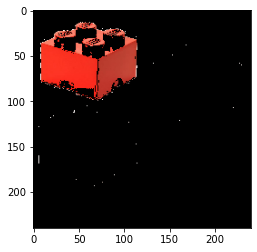

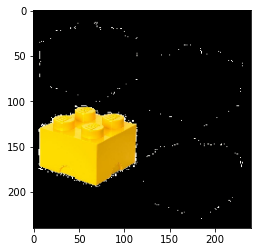

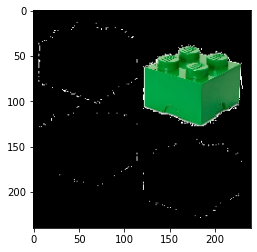

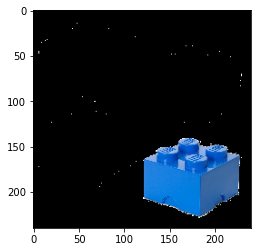

<Figure size 432x288 with 0 Axes>

In [ ]:
print('There are ',len(fp_scipy['prominences']),'Hue peaks')
#print( ' i added a tolerance to the width of the mask because othersiise the resulting image was very grainy')
tol= 0
for numb in range(len(fp_scipy['prominences'])):

    #mask for object segmentation
    lower_mask = hsv_img[:,:,0] > fp_scipy['left_bases'][numb] -tol
    upper_mask = hsv_img[:,:,0] < fp_scipy['right_bases'][numb] +tol
    mask = upper_mask*lower_mask
    plt.imshow(mask)
    
    #show segmented image
    red = rgb_img[:,:,0]*mask
    green = rgb_img[:,:,1]*mask
    blue = rgb_img[:,:,2]*mask
    masked_img = np.dstack((red,green,blue))
    plt.imshow(masked_img)
    plt.figure()
    
    # show the color
    color_prominence= np.ones([50,50])
    color_prominence= color_prominence*fp_scipy['prominences'][numb]
    #plt.imshow(color_prominence)
    #plt.figure()
    
    

## same thing but with a blurred image

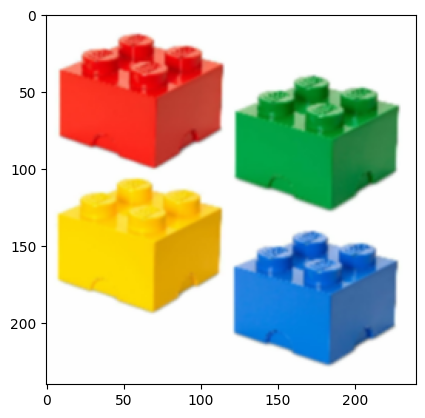

In [23]:
#blurring
kernel_size=3
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
plt.imshow(smooth_img)


[  2  26  73 107]
{'prominences': array([2242., 2675., 1606., 1653.]), 'left_bases': array([ 1, 18, 53, 91], dtype=int64), 'right_bases': array([ 12,  31,  82, 117], dtype=int64)}


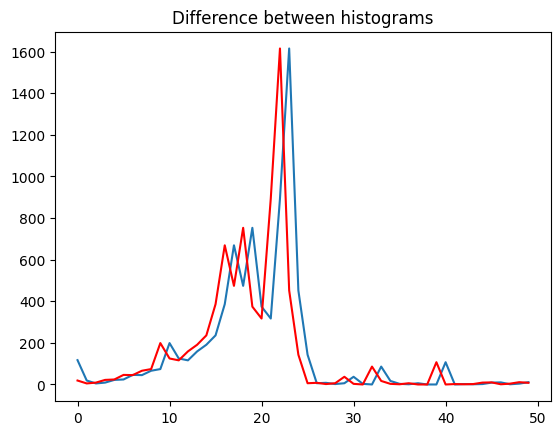

There are  4 Hue peaks


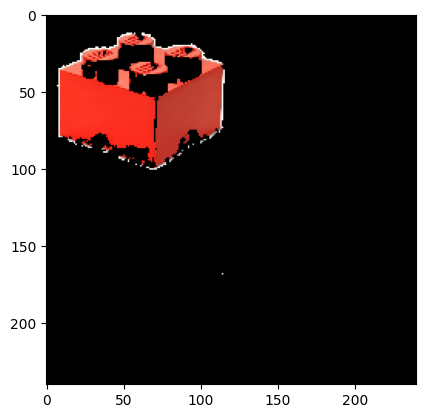

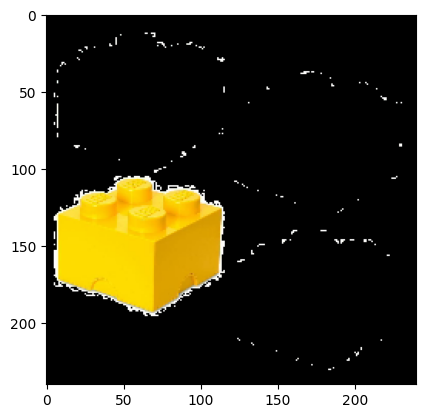

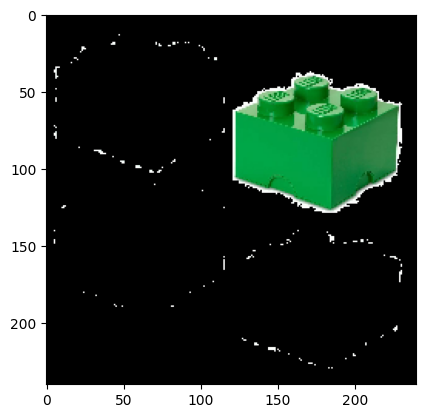

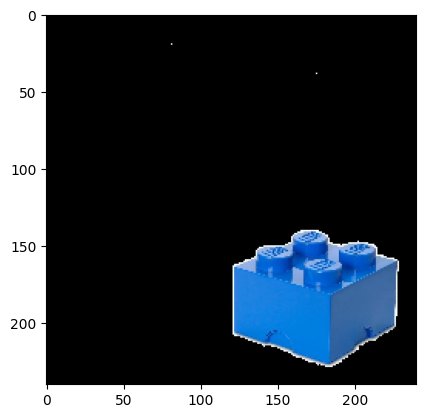

<Figure size 640x480 with 0 Axes>

In [24]:
# using a blurred image for object segmentation
hsv_img = cv.cvtColor(smooth_img, cv.COLOR_RGB2HSV)
h_smooth = smooth_img[:,:,0]
hist_h_smooth = cv.calcHist([h],[0],None,[256],[0,256])


peaks,fp_scipy = sp.signal.find_peaks(hist_h_smooth.transpose()[0], prominence = 1000, distance = 5, wlen=40)
print(peaks) # of segmented object
print(fp_scipy)

plt.plot(hist_h_smooth[50:100])
plt.plot(hist_h[50:100], 'r')
plt.title('Difference between histograms')

plt.show()
plt.figure()

print('There are ',len(fp_scipy['prominences']),'Hue peaks')
tol=0

for numb in range(len(fp_scipy['prominences'])):

    #mask for object segmentation
    lower_mask = hsv_img[:,:,0] > fp_scipy['left_bases'][numb] 
    upper_mask = hsv_img[:,:,0] < fp_scipy['right_bases'][numb] 
    mask = upper_mask*lower_mask
    plt.imshow(mask)

    red = rgb_img[:,:,0]*mask
    green = rgb_img[:,:,1]*mask
    blue = rgb_img[:,:,2]*mask
    masked_img = np.dstack((red,green,blue))
    plt.imshow(masked_img)
    plt.figure()
    #save one of the objects for further analysis
    if numb==2:
        object_img=masked_img

NameError: name 'masked_hsv_img' is not defined

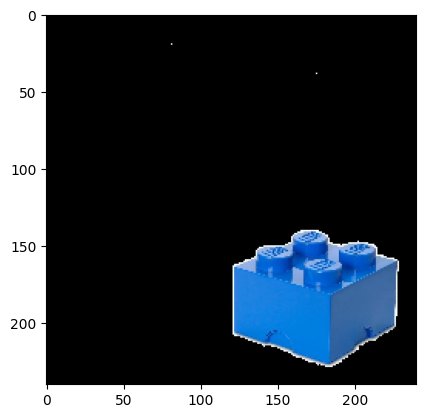

<Figure size 640x480 with 0 Axes>

In [25]:
plt.imshow(masked_img)
plt.figure()

print(masked_hsv_img.shape)
#print(masked_hsv_img)

masked_hsv_img = cv.cvtColor(masked_img, cv.COLOR_RGB2HSV)

h = masked_hsv_img[:,:,0]
s = masked_hsv_img[:,:,1]
v = masked_hsv_img[:,:,2]

hist_h = cv.calcHist([h],[0],None,[256],[1,256])
hist_s = cv.calcHist([s],[0],None,[256],[1,255])
hist_v = cv.calcHist([v],[0],None,[256],[1,255]) # excluding black background
plt.plot(hist_h, color='r', label="hue")
plt.title(' Hue of the segmented object (excluding zero)')
plt.figure()

peaks_s,fp_scipy_s = sp.signal.find_peaks(hist_s.transpose()[0], prominence = 50, distance = 5, wlen=40)
peak_location= np.argmax(fp_scipy_s['prominences'])
saturation= peaks_s[peak_location]

peaks_v,fp_scipy_v = sp.signal.find_peaks(hist_v.transpose()[0], prominence = 50, distance = 5, wlen=40)
peak_location= np.argmax(fp_scipy_v['prominences'])
value= peaks_v[peak_location]

plt.plot(hist_s, color='g', label="saturation")
plt.title(' Sat of the segmented object (excluding zero)')
plt.figure()
plt.plot(hist_v, color='b', label="value")
plt.title(' Value of the segmented object (excluding zero and max)')
plt.figure()

# show the color with different V and S
color_prominence= np.ones((250,250,3))
print(peaks)
hue= peaks
color_prominence[:,:,0]=  hue
#color_prominence[:,:,1]= color_prominence[:,:,1]* 250
#color_prominence[:,:,2]= color_prominence[:,:,2]* 250 #value
for i in range(0,250):
    color_prominence[:,i,1]= color_prominence[:,i,1]* i #S
    color_prominence[i,:,2]= color_prominence[i,:,2]* (250-i) # V

color_prominence = cv.convertScaleAbs(color_prominence)
color_prominence_RGB = cv.cvtColor(color_prominence, cv.COLOR_HSV2RGB)
plt.imshow(color_prominence_RGB)
plt.xlabel('Increasing Saturation --> ')
plt.ylabel('Increasing Value -->')
plt.title('The extracted color of the object')
plt.figure()
    
final_color=np.ones((250,250,3))
final_color[:,:,0]=  hue
final_color[:,:,1]=  saturation #253
final_color[:,:,2]=  value #163
final_color = cv.convertScaleAbs(final_color)
final_color_RGB = cv.cvtColor(final_color, cv.COLOR_HSV2RGB)
plt.imshow(final_color_RGB)
plt.title('Final color of object')

print('HSV', hue, saturation,value)


## turning everything into functions

In [ ]:
def extract_color(material_number,masked_img, peaks, show_graphs=False):
    masked_hsv_img = cv.cvtColor(masked_img, cv.COLOR_RGB2HSV)

    h = masked_hsv_img[:,:,0]
    s = masked_hsv_img[:,:,1]
    v = masked_hsv_img[:,:,2]

    hist_h = cv.calcHist([h],[0],None,[256],[1,256])
    hist_s = cv.calcHist([s],[0],None,[256],[1,255])
    hist_v = cv.calcHist([v],[0],None,[256],[1,255]) # excluding black background
    
    peaks_s,fp_scipy_s = sp.signal.find_peaks(hist_s.transpose()[0], prominence = 50, distance = 5, wlen=40)
    if (len(fp_scipy_s['prominences'])!=0):
        peak_location= np.argmax(fp_scipy_s['prominences'])
        saturation= peaks_s[peak_location]
    else:
        print('invalid material Saturation')
        material_number ='N'
    
    
    peaks_v,fp_scipy_v = sp.signal.find_peaks(hist_v.transpose()[0], prominence = 50, distance = 5, wlen=40)
    if (len(fp_scipy_v['prominences'])!=0):
        peak_location= np.argmax(fp_scipy_v['prominences'])
        value= peaks_v[peak_location]
    else:
        print('invalid material Value')
        material_number= 'N'
    
    if material_number !='N':
        hue= peaks[material_number]

    if(show_graphs and material_number !='N'):
        plt.plot(hist_h, color='r', label="hue")
        plt.title(' Hue of the segmented object (excluding zero)')
        
        plt.plot(hist_s, color='g', label="saturation")
        plt.title(' Sat of the segmented object (excluding zero)')
        plt.show()

        plt.plot(hist_v, color='b', label="value")
        plt.title(' Value of the segmented object (excluding zero and max)')
        plt.show()

        # show the color with different V and S
        color_prominence= np.ones((250,250,3))

        color_prominence[:,:,0]= hue
        for i in range(0,250):
            color_prominence[:,i,1]= color_prominence[:,i,1]* i #S
            color_prominence[i,:,2]= color_prominence[i,:,2]* (250-i) # V

        color_prominence = cv.convertScaleAbs(color_prominence)
        color_prominence_RGB = cv.cvtColor(color_prominence, cv.COLOR_HSV2RGB)
        plt.imshow(color_prominence_RGB)
        plt.xlabel('Increasing Saturation --> ')
        plt.ylabel('Increasing Value -->')
        plt.title('The extracted color of the object')
        plt.figure()
        
    if material_number !='N':

        final_color=np.ones((50,50,3))
        final_color[:,:,0]=  hue
        final_color[:,:,1]=  saturation
        final_color[:,:,2]=  value 
        final_color = cv.convertScaleAbs(final_color)
        final_color_RGB = cv.cvtColor(final_color, cv.COLOR_HSV2RGB)
    
        plt.subplot(1, 2, 1) # row 1, col 2 index 1
        plt.imshow(masked_img)
    
        plt.subplot(1, 2, 2) # index 2
        plt.imshow(final_color_RGB)
        plt.title('Final color of object')
        plt.figure()


        print('material', material_number,'HSV', hue, saturation,value)
    
        material_color_hsv= np.uint8([[[hue,saturation,value]]])  
        material_color_rgb = cv.cvtColor(material_color_hsv, cv.COLOR_HSV2RGB)
        # mat_number, where it acts, rgb alpha, enabled?
        volume_properties.append([material_number,0,material_color_rgb[0][0][0], material_color_rgb[0][0][1], material_color_rgb[0][0][2], 255, 1])


In [ ]:
def hsv_analysis(rgb_img,show_graphs= False):
    
    hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)


    h = hsv_img[:,:,0]
    s = hsv_img[:,:,1]
    v = hsv_img[:,:,2]

    hist_h = cv.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv.calcHist([v],[0],None,[256],[0,256])

    peaks,fp_scipy = sp.signal.find_peaks(hist_h.transpose()[0], prominence = 1000, distance = 5, wlen=40)

    print('There are ',len(fp_scipy['prominences']),'Hue peaks')
    for material_number in range(len(fp_scipy['prominences'])):

        #mask for object segmentation
        lower_mask = hsv_img[:,:,0] > fp_scipy['left_bases'][material_number] 
        upper_mask = hsv_img[:,:,0] < fp_scipy['right_bases'][material_number]
        mask = upper_mask*lower_mask

        #show segmented image
        red = rgb_img[:,:,0]*mask
        green = rgb_img[:,:,1]*mask
        blue = rgb_img[:,:,2]*mask
        masked_img = np.dstack((red,green,blue))

        extract_color(material_number, masked_img, peaks,show_graphs)


There are  4 Hue peaks


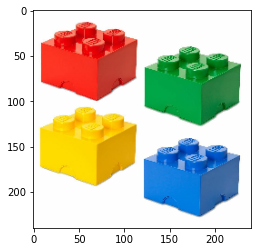

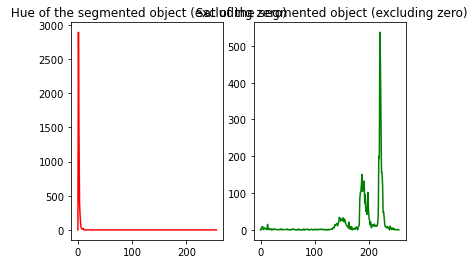

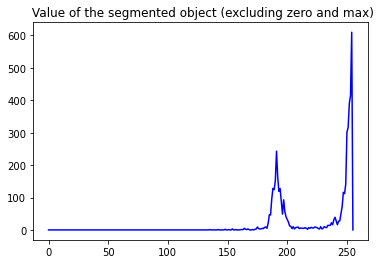

material 0 HSV 2 220 254


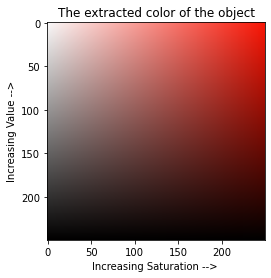

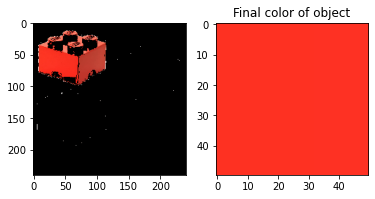

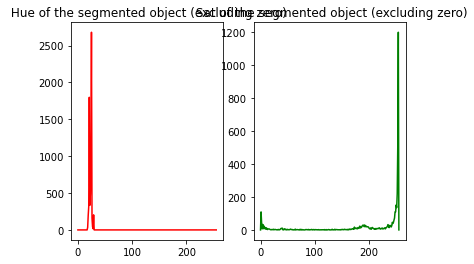

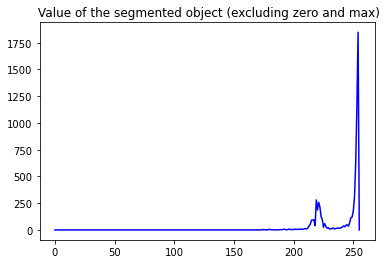

material 1 HSV 26 254 254


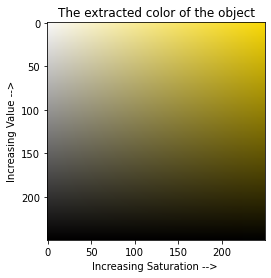

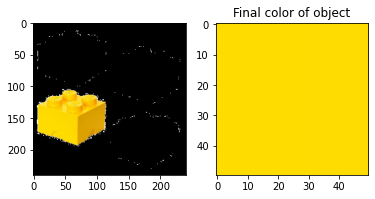

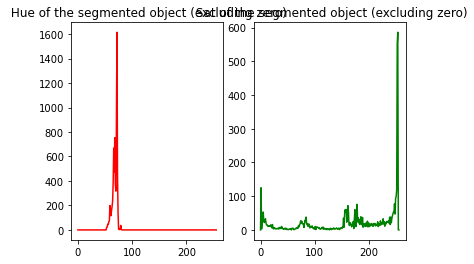

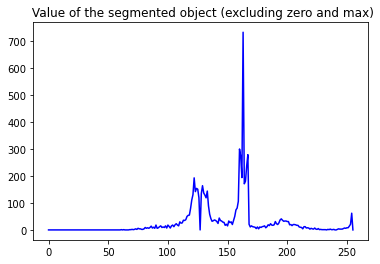

material 2 HSV 73 253 163


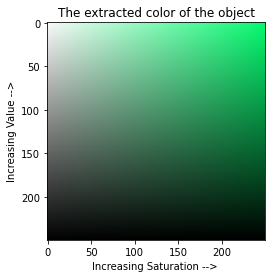

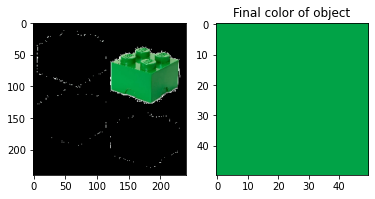

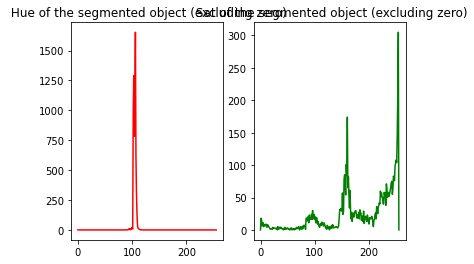

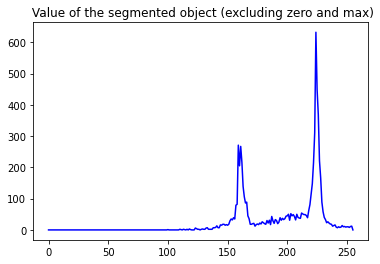

material 3 HSV 107 254 224


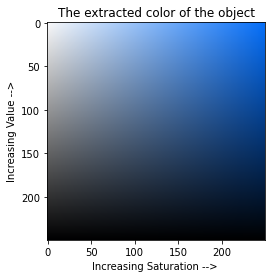

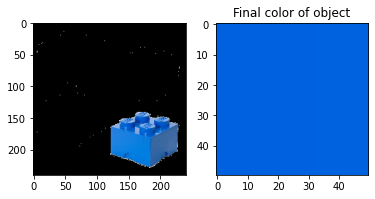

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/lego_sample.png")
plt.imshow(rgb_img)
plt.figure()

hsv_analysis(rgb_img,True)

There are  4 Hue peaks
material 0 HSV 2 220 254
material 1 HSV 26 254 254
material 2 HSV 73 253 163
material 3 HSV 107 254 224
[[0, 0, 254, 49, 35, 255, 1], [1, 0, 254, 220, 1, 255, 1], [2, 0, 1, 163, 71, 255, 1], [3, 0, 1, 98, 224, 255, 1]]


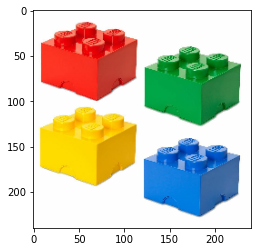

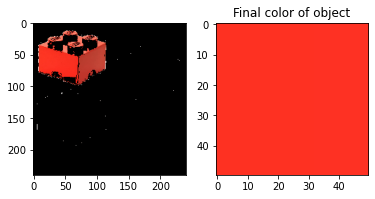

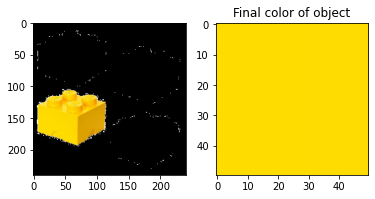

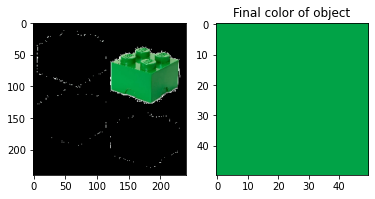

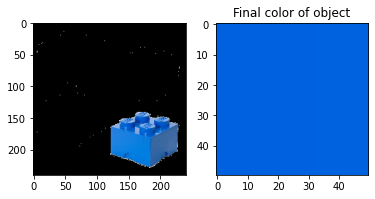

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/lego_sample.png")
plt.imshow(rgb_img)
plt.figure()

volume_properties= []
hsv_analysis(rgb_img)
print(volume_properties)
make_file('lego_blocks_example',volume_properties)

There are  10 Hue peaks


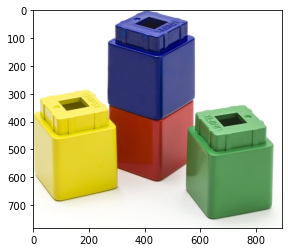

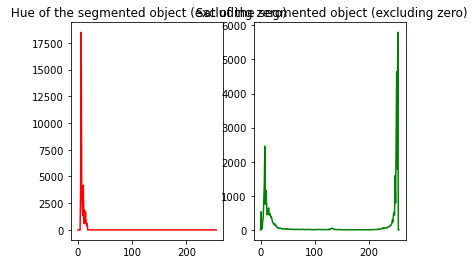

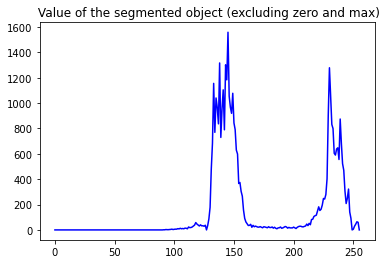

material 0 HSV 7 253 145


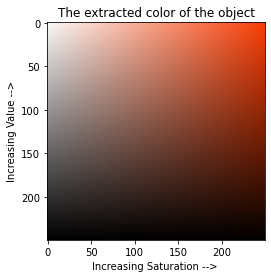

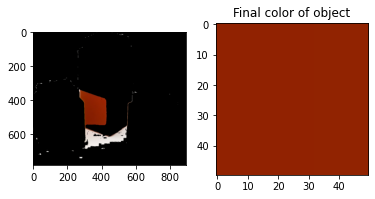

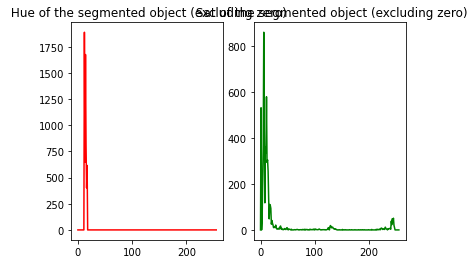

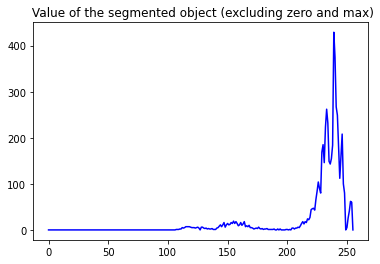

material 1 HSV 13 6 239


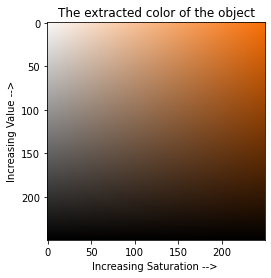

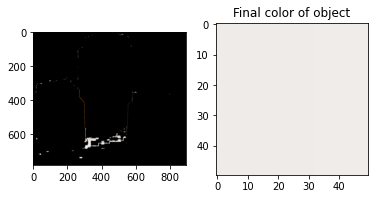

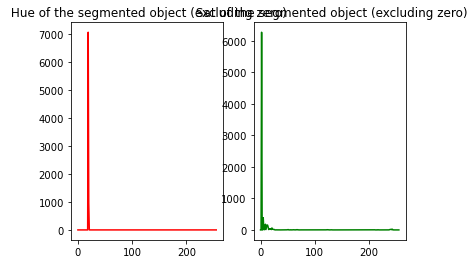

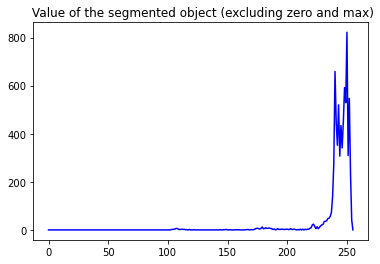

material 2 HSV 20 2 250


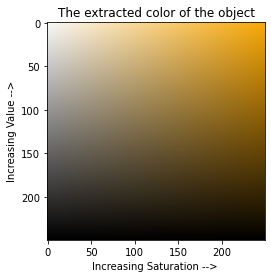

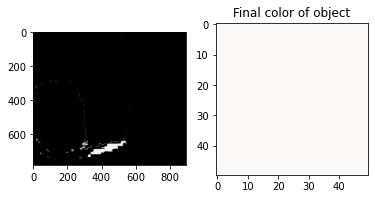

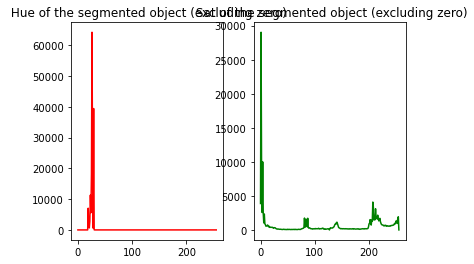

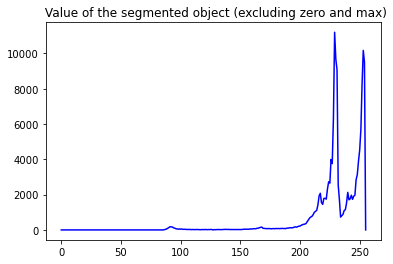

material 3 HSV 27 1 229


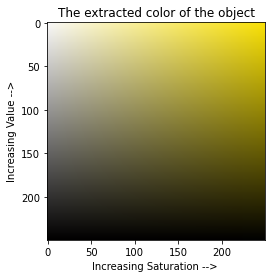

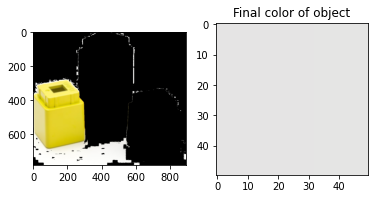

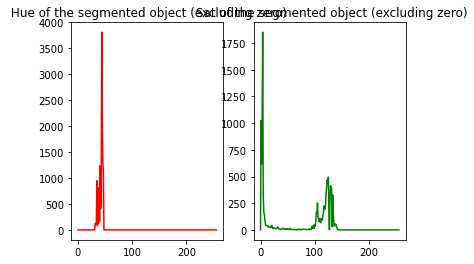

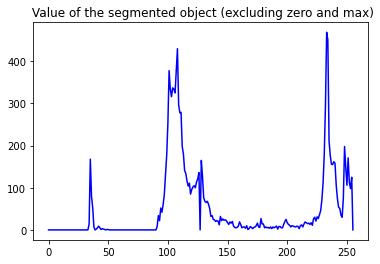

material 4 HSV 45 4 233


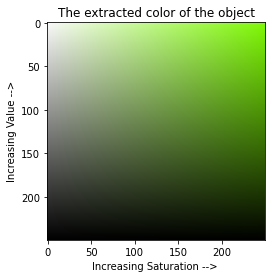

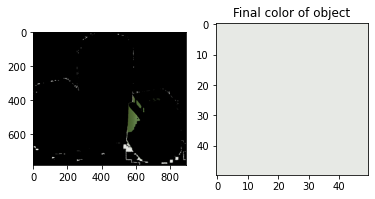

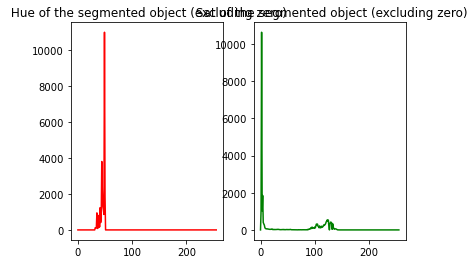

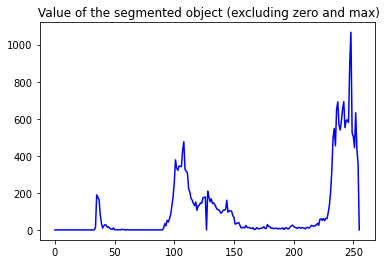

material 5 HSV 50 2 248


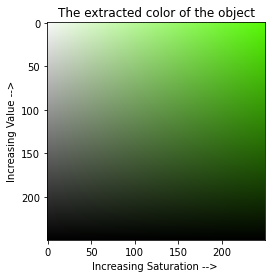

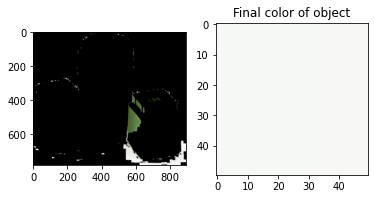

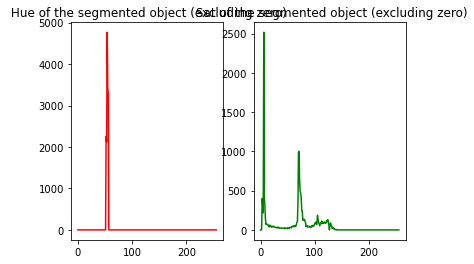

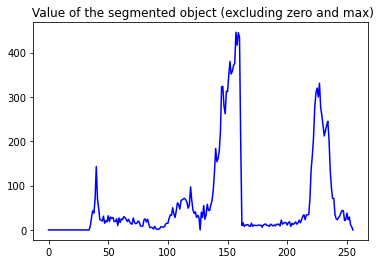

material 6 HSV 55 6 157


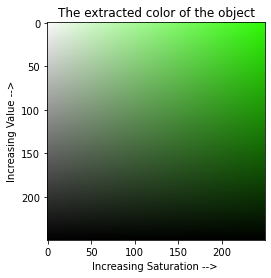

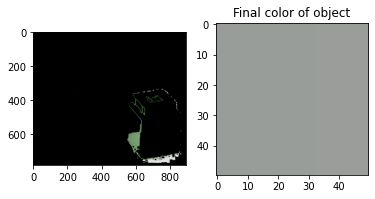

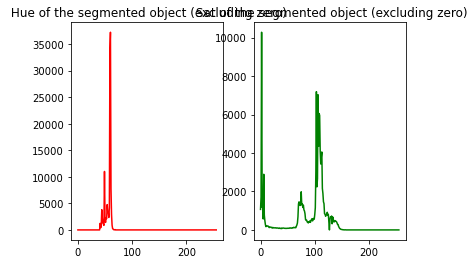

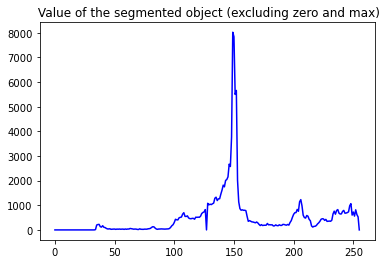

material 7 HSV 61 2 149


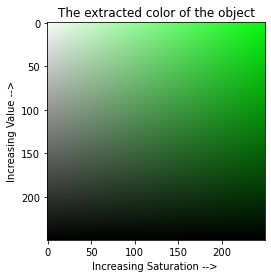

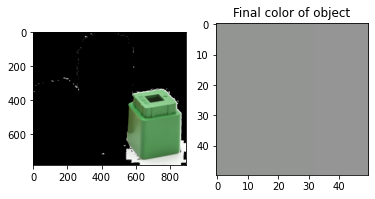

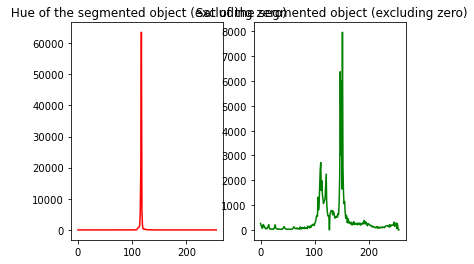

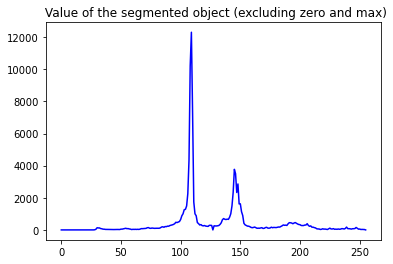

material 8 HSV 118 151 109
invalid material Saturation


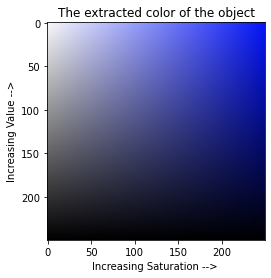

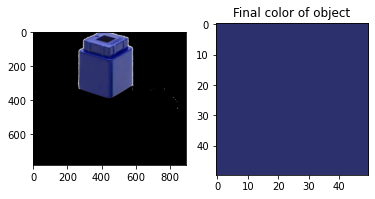

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/coloured_cubes_sample.jpg")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, True)

## effect of removing background on a real image

There are  4 Hue peaks
material 0 HSV 7 253 145
material 1 HSV 27 207 229
material 2 HSV 61 103 150
material 3 HSV 118 151 109


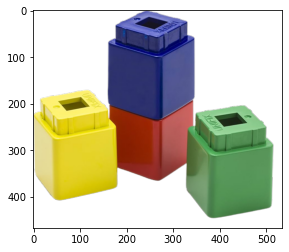

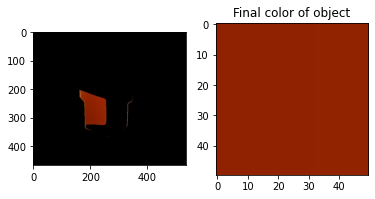

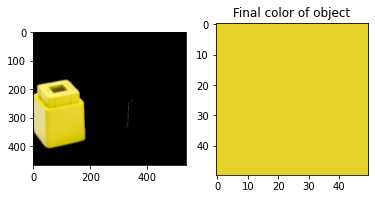

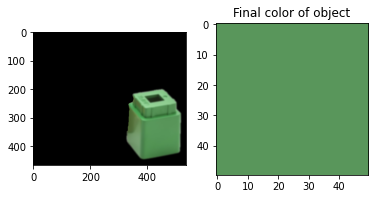

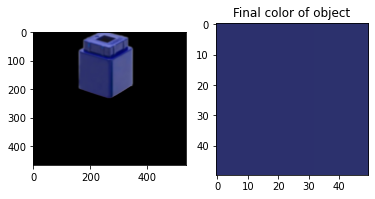

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/coloured_cubes_sample-removebg-preview.png")
plt.imshow(rgb_img)
plt.figure()
#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img)

There are  3 Hue peaks


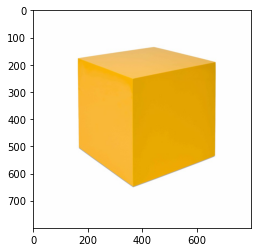

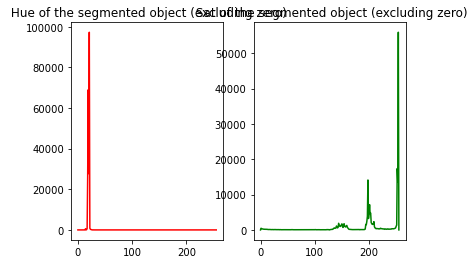

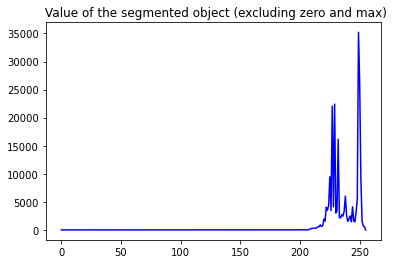

material 0 HSV 22 254 249
invalid material Saturation
invalid material Saturation


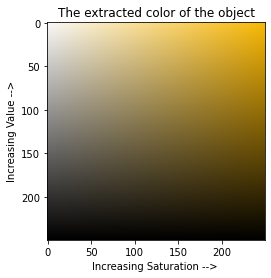

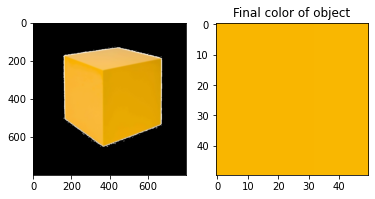

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/yellow_cube_sample.jpg")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, True)

There are  9 Hue peaks


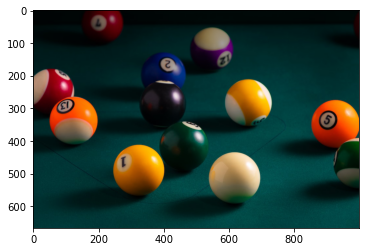

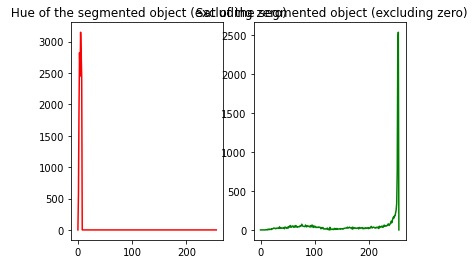

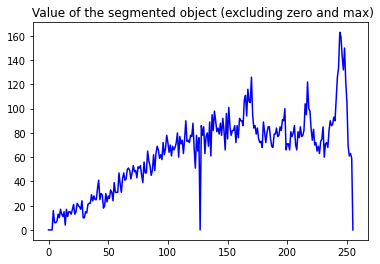

material 0 HSV 6 254 244


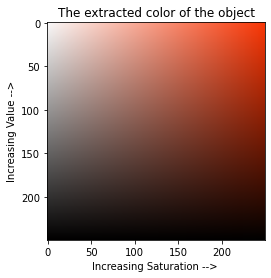

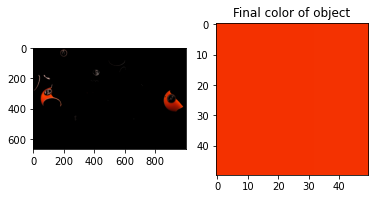

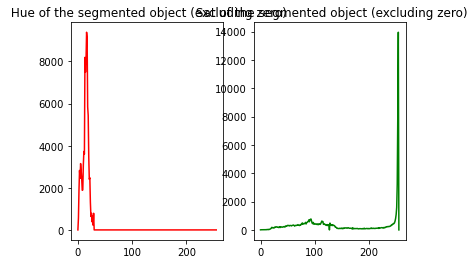

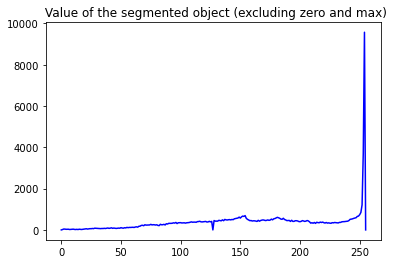

material 1 HSV 17 254 254


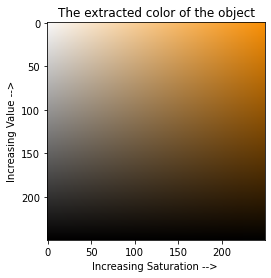

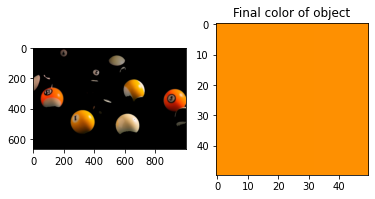

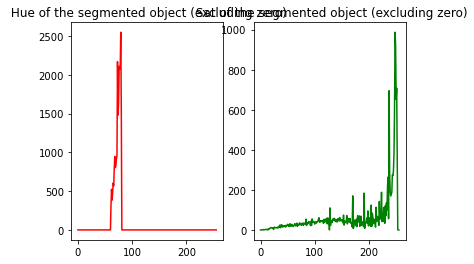

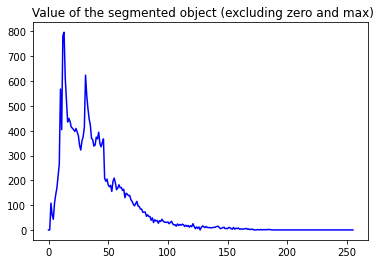

material 2 HSV 80 248 13


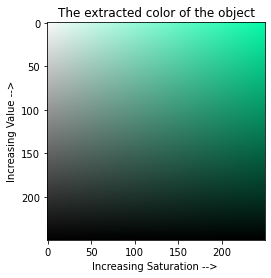

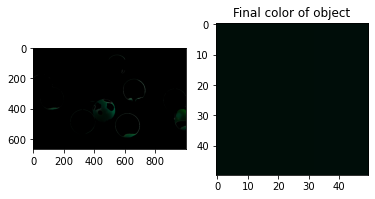

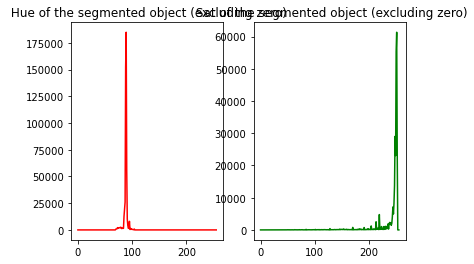

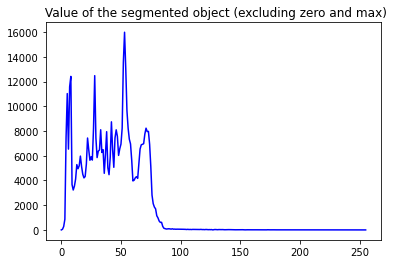

material 3 HSV 90 251 53


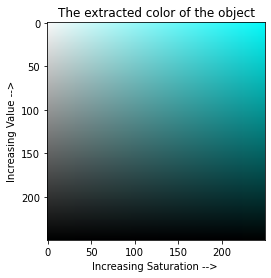

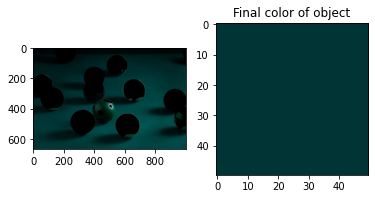

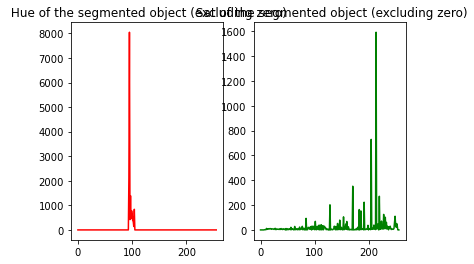

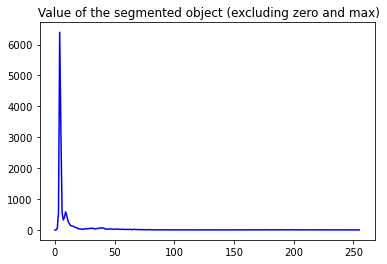

material 4 HSV 96 213 4


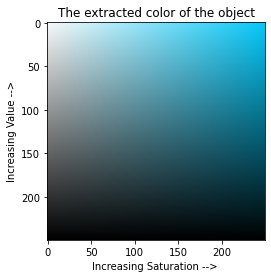

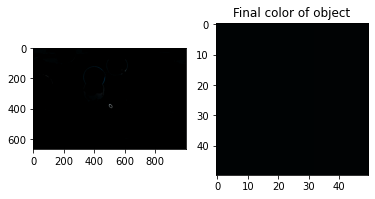

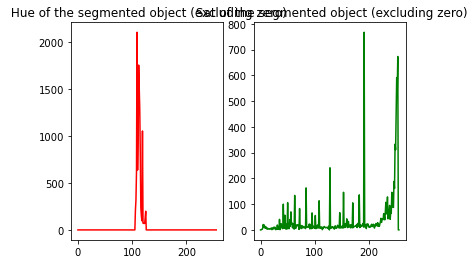

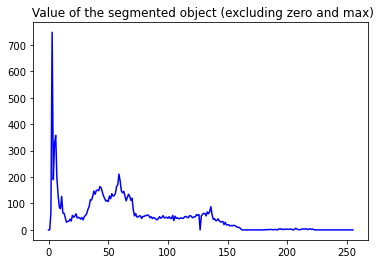

material 5 HSV 110 191 3


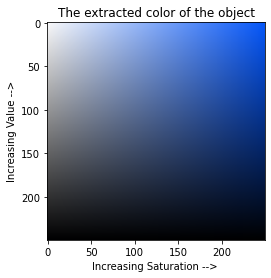

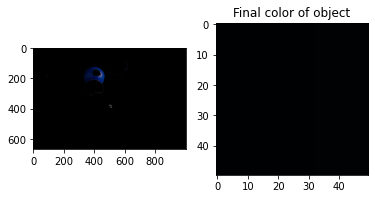

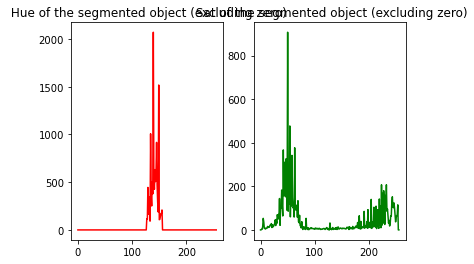

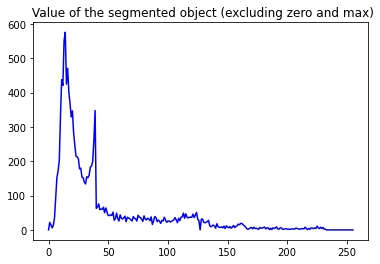

material 6 HSV 140 50 14


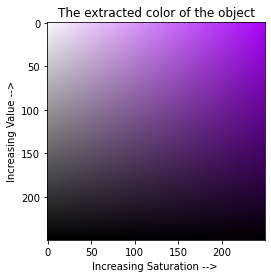

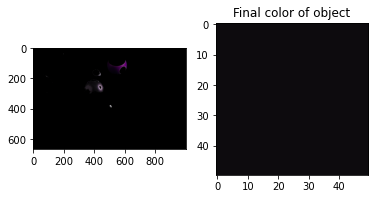

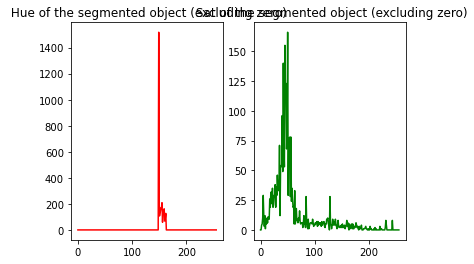

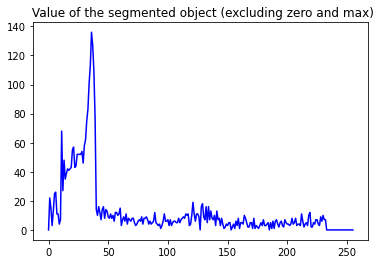

material 7 HSV 150 50 36


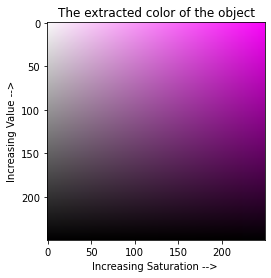

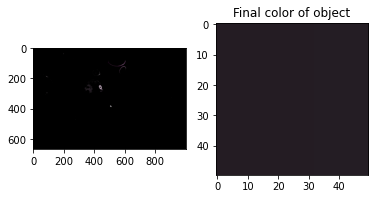

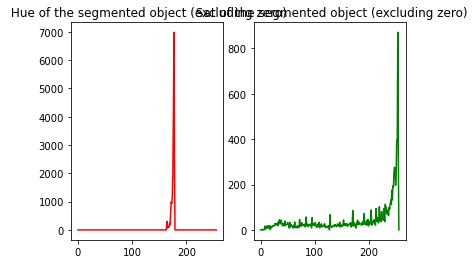

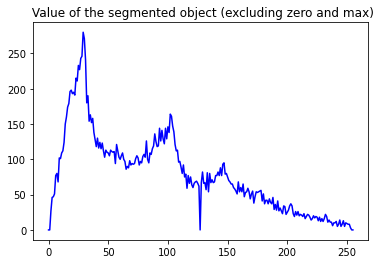

material 8 HSV 178 253 29


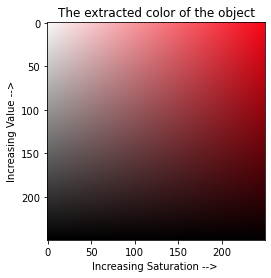

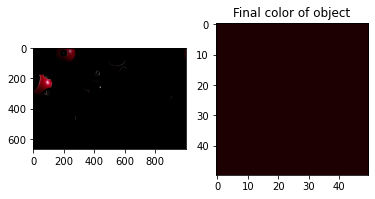

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/billiard_balls_sample.jpg")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, True)

There are  4 Hue peaks


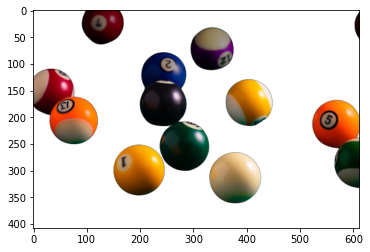

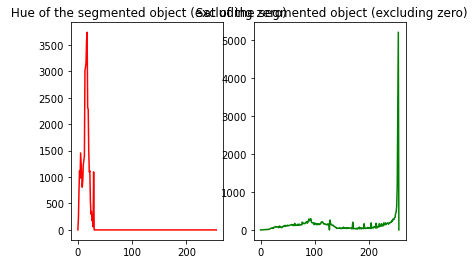

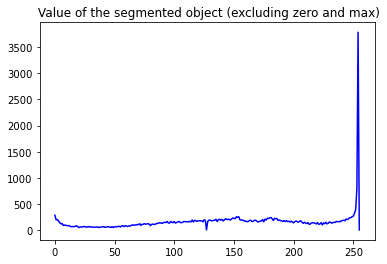

material 0 HSV 18 254 254
invalid material Value
invalid material Value


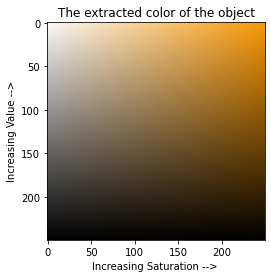

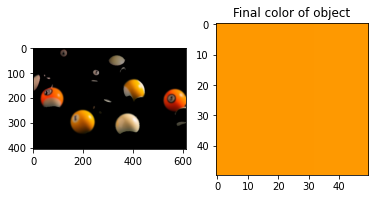

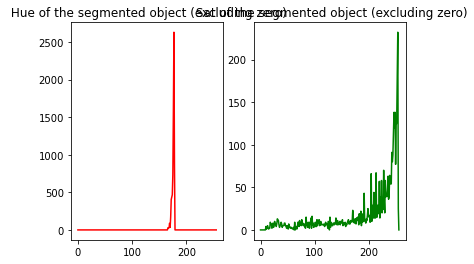

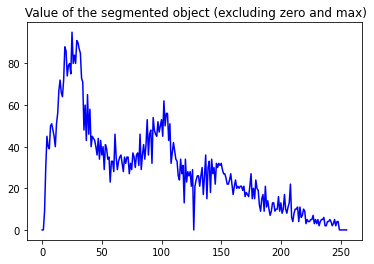

material 3 HSV 178 253 25


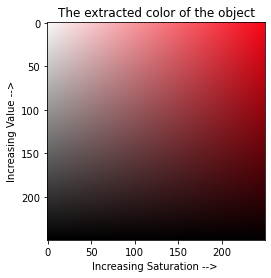

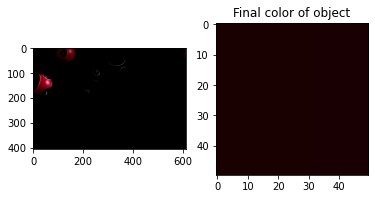

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/billiard_balls_sample-removebg-preview.png")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, True)

There are  13 Hue peaks
material 0 HSV 13 17 213
material 1 HSV 24 5 223
material 2 HSV 30 4 225
material 3 HSV 36 5 228
material 4 HSV 42 5 230
material 5 HSV 50 2 232
material 6 HSV 55 6 109
material 7 HSV 60 2 107
material 8 HSV 70 3 87
material 9 HSV 75 1 254
material 10 HSV 83 3 254
material 11 HSV 90 4 254
material 12 HSV 96 4 254


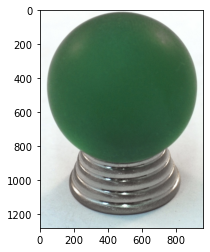

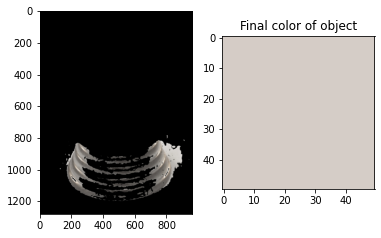

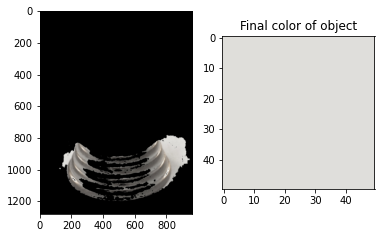

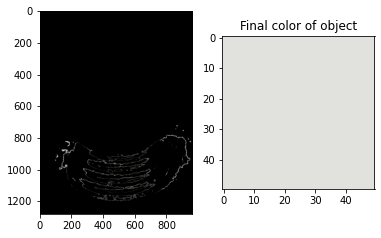

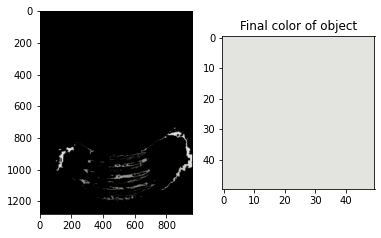

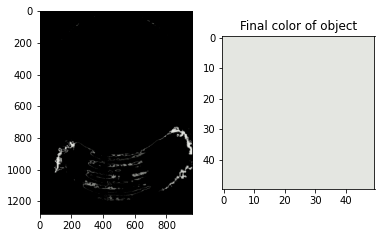

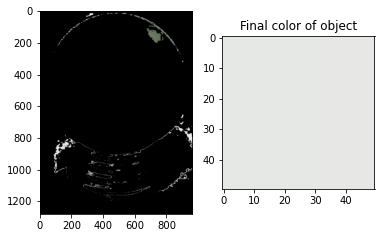

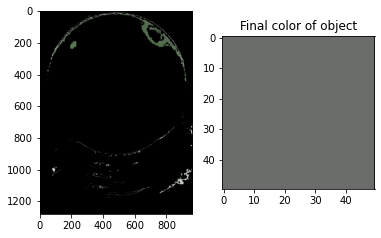

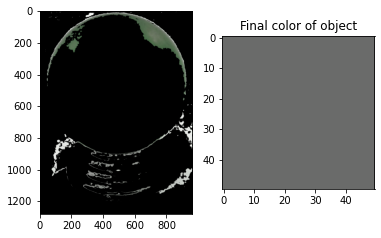

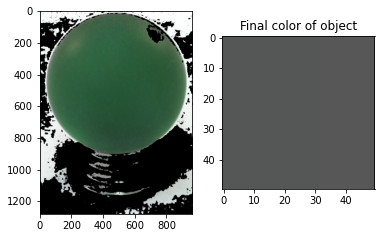

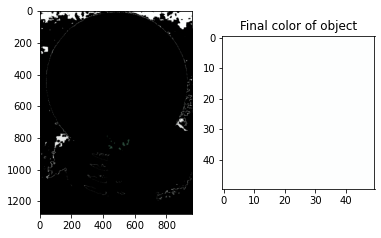

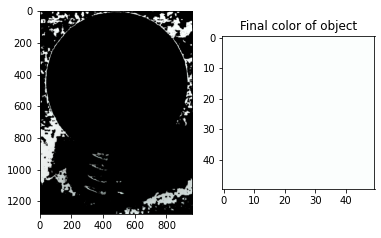

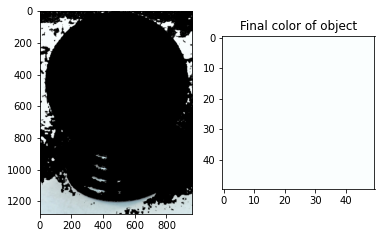

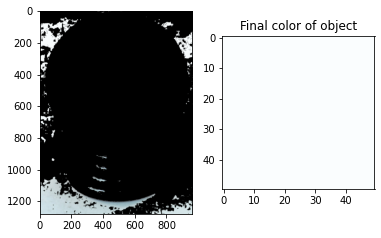

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/materials_sample.jpg")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, False)

There are  7 Hue peaks
material 0 HSV 15 17 95
material 1 HSV 24 9 102
invalid material Value
material 3 HSV 36 8 144
material 4 HSV 42 8 145
material 5 HSV 60 6 108
material 6 HSV 70 135 87


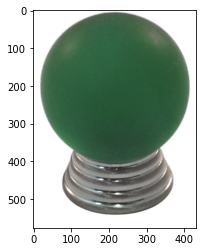

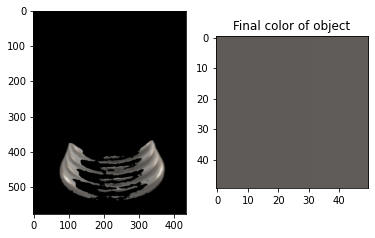

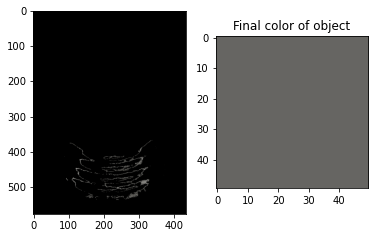

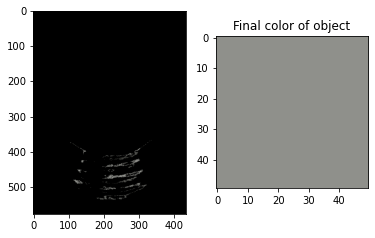

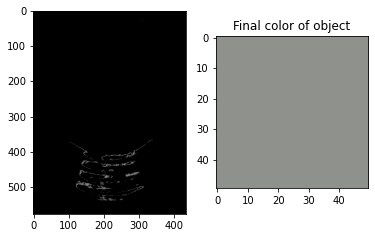

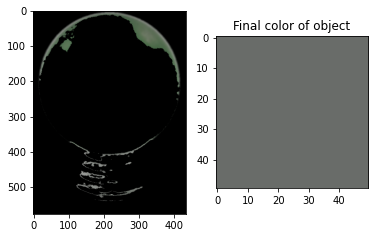

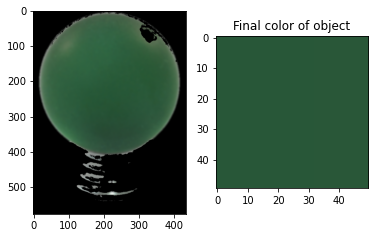

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/materials_sample-removebg-preview.png")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, False)

There are  12 Hue peaks
material 0 HSV 12 2 229
material 1 HSV 20 2 229
material 2 HSV 30 1 232
material 3 HSV 35 35 128
material 4 HSV 45 25 110
invalid material Value
material 6 HSV 135 1 250
material 7 HSV 140 2 250
invalid material Saturation
material 9 HSV 165 1 244
material 10 HSV 170 2 249
material 11 HSV 177 22 85


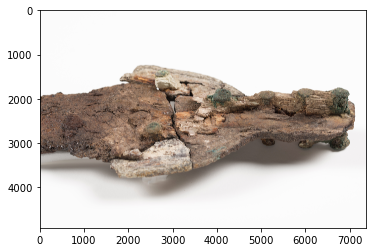

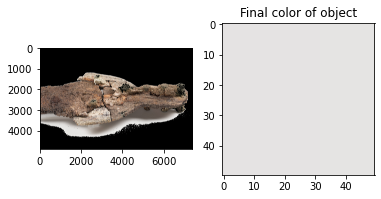

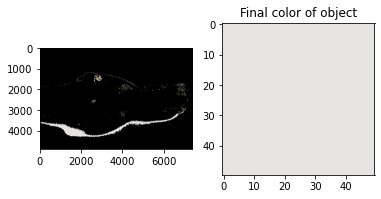

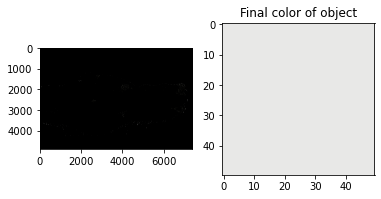

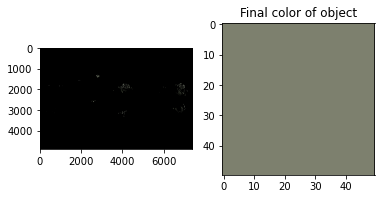

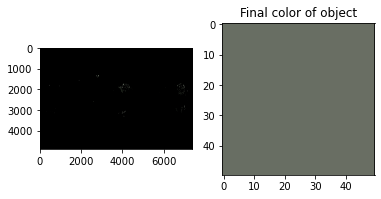

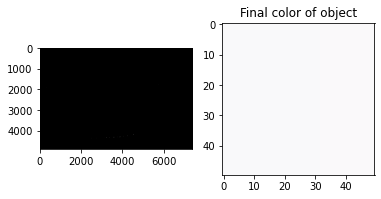

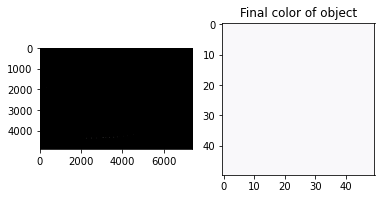

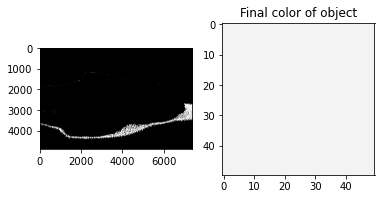

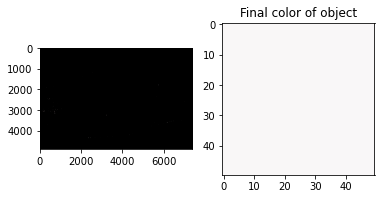

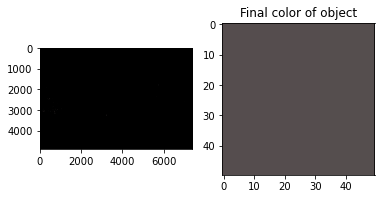

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/very_old_sword.jpg")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=11
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, False)

There are  1 Hue peaks
material 0 HSV 12 83 139


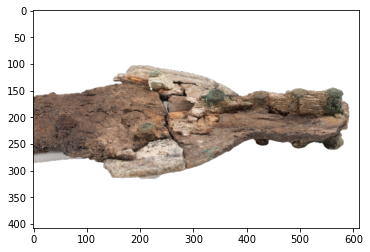

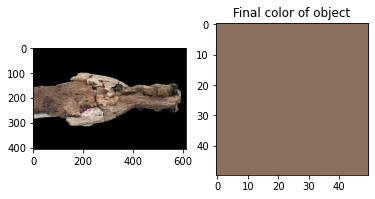

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/very_old_sword-removebg-preview.png")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=1
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, False)

There are  13 Hue peaks
material 0 HSV 3 33 2
material 1 HSV 8 63 2
invalid material Saturation
invalid material Saturation
invalid material Value
material 4 HSV 75 170 1
material 5 HSV 100 191 2
material 6 HSV 120 170 1
material 7 HSV 125 11 4
material 8 HSV 135 11 4
material 9 HSV 140 12 4
material 10 HSV 150 13 1
material 11 HSV 170 23 2
material 12 HSV 177 42 126


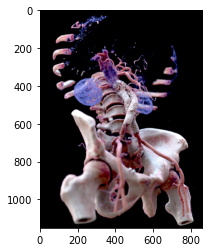

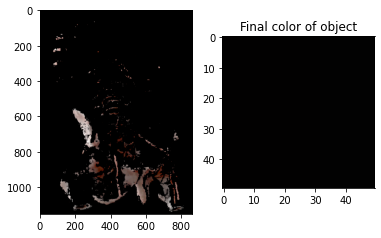

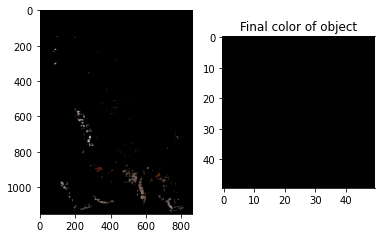

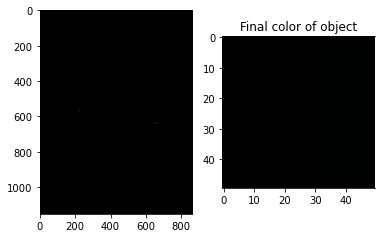

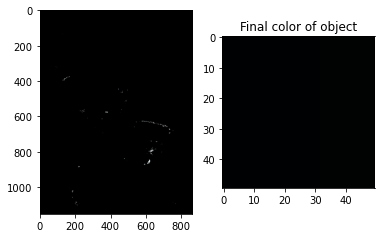

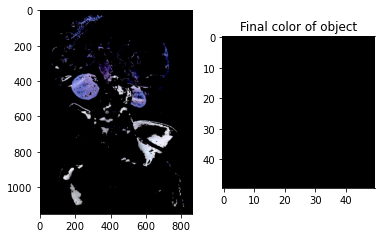

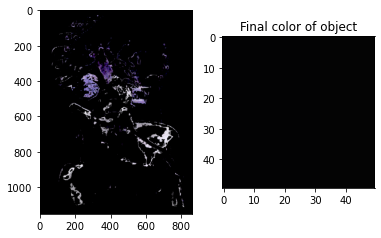

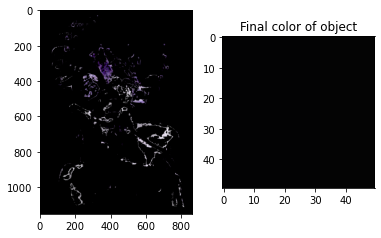

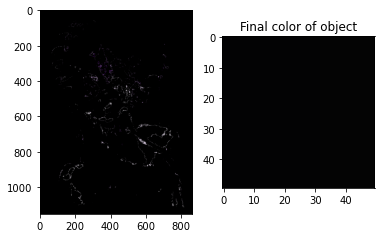

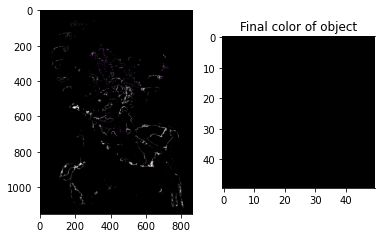

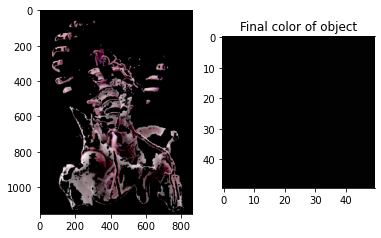

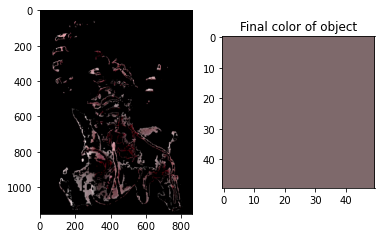

<Figure size 432x288 with 0 Axes>

In [ ]:
rgb_img = imageio.imread("C:/Users/Ana Stojanovic/Downloads/pretty_image.png")
plt.imshow(rgb_img)
plt.figure()

#blurring
kernel_size=1
smooth_img = cv.GaussianBlur(rgb_img, (kernel_size, kernel_size), 0)
#plt.imshow(smooth_img)

hsv_analysis(smooth_img, False)

## Making a text file

In [ ]:

def make_file(file_name,volume_properties ):
    complete_file_path= "C:/Users/Ana Stojanovic/AppData/Roaming/Stradview/volumes/"+file_name+".ini"
    file = open(complete_file_path, "w")  

    for i in range(len(volume_properties)):
        file.write("VOLUME ")
        for j in range(len(volume_properties[i])):
            file.write(str(volume_properties[i][j]))
            file.write(" ")  
        file.write("\n")  
    file.close()  

volume_properties=[[1,2,3,4,5,0,0,0,0,0], [1,22,33,44,55,0,0,0,0,0]]
make_file('example2',volume_properties)